# Part-I Task-1

**Task-1** The data set consists of the multi-spectral values of pixels in $3 \times 3$ neighbourhoods in a satellite image, and the label information associated with the central pixel in each neighbourhood. This data set was generated from Landsat Multi-Spectral Scanner image data. To facilitate your data analysis process, we have done sampling and data pre-processing for you. All the features are named as ``Feature #'', and the last attribute is the label (each number corresponds to a class). This is a multi-class classification problem.

Notes:

- You need to tune the hyperparameter $K$ for the $K$-NN classifier, and impurity heuristics (information gain or Gini) for the decision tree classifier. Also, the pruning methods could be considered to tune the decision trees.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import preprocessing # import preprocessing

from sklearn.tree import DecisionTreeClassifier # decision tree import
from sklearn.neighbors import KNeighborsClassifier # import neighbors
from sklearn.model_selection import train_test_split # import train test split

data_path="drive/My Drive/Colab Notebooks"
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data = pd.read_csv(f"{data_path}/MQClass/Assign-1/data/landsat/landsat.csv")
data

In [ ]:
# checking with data.isnull().sum(), there are no null data thus there's no need to drop rows or add values
X = data.drop(['Label'], axis='columns') # drop label column
X.head()
scaler = preprocessing.MinMaxScaler() # preprocessing all the features
X_data = X.values

X_scaled = scaler.fit_transform(X_data)
X = X_scaled #X
y = data['Label'].values #y


In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=142)


Best K value for K-NN:  5


Text(0.5, 1.0, 'Accuracy scores at different n_neighbors values')

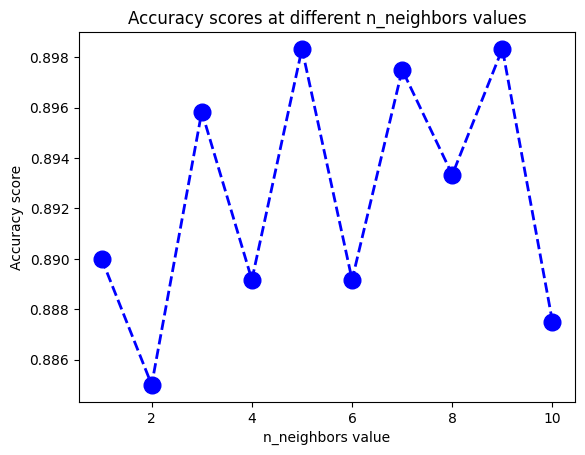

In [ ]:
#K-NN Classification
from sklearn import metrics
accuracies = []
n_neighbors_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
best_acc = 0
for n_neighbor in n_neighbors_values:
    knn = KNeighborsClassifier(n_neighbors=n_neighbor)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    if acc > best_acc:
        best_acc = acc
        best_k = n_neighbor
print("Best K value for K-NN: ", best_k)
plt.plot(n_neighbors_values, accuracies, color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.xlabel('n_neighbors value')
plt.ylabel('Accuracy score')
plt.title('Accuracy scores at different n_neighbors values')

In [ ]:
# Decision Tree - Testing which impurity heuristics (criterion) is the most accurate
dtgini = DecisionTreeClassifier(criterion='gini', random_state=142)
dtentropy = DecisionTreeClassifier(criterion='entropy', random_state=142)
dtlog_loss = DecisionTreeClassifier(criterion='log_loss', random_state=142)

# model training on the training data
dtgini.fit(X_train, y_train)
dtentropy.fit(X_train, y_train)
dtlog_loss.fit(X_train, y_train)


# making predictions on the test set
y_pred_gini = dtgini.predict(X_test)
y_pred_entropy = dtentropy.predict(X_test)
y_pred_log_loss = dtlog_loss.predict(X_test)

# reporting accuracy score on the test set
print("Accuracy score using gini before pruning: ", metrics.accuracy_score(y_test, y_pred_gini))
print("Accuracy score using entropy before pruning: ", metrics.accuracy_score(y_test, y_pred_entropy))
print("Accuracy score using log loss before pruning: ", metrics.accuracy_score(y_test, y_pred_log_loss))

print("Most accurate impurity heuristics before pruning: entropy/log loss ")

Accuracy score using gini before pruning:  0.8433333333333334
Accuracy score using entropy before pruning:  0.8475
Accuracy score using log loss before pruning:  0.8475
Most accurate impurity heuristics before pruning: entropy/log loss 


In [ ]:
# Decision Tree Gini Pruned using path
path = dtgini.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
pruned_dtgini =  DecisionTreeClassifier(criterion='gini',ccp_alpha=ccp_alphas, random_state=42)
pruned_dtgini.fit(X_train, y_train)
y_pred_pruned_dtgin = pruned_dtgin.predict(X_test)
print("Accuracy score using gini after pruning: ", metrics.accuracy_score(y_test, y_pred_pruned_dtgin))

InvalidParameterError: ignored

In [ ]:
#Becuase of the error, I decided to set the ccp_alpha to 0.02
# Decision Tree Pruned using ccp_alpha 0.02
dtginiprune = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.020, random_state=142)
dtentropyprune = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.020, random_state=142)
dtlog_lossprune = DecisionTreeClassifier(criterion='log_loss', ccp_alpha=0.020, random_state=142)

# model training on the training data
dtginiprune.fit(X_train, y_train)
dtentropyprune.fit(X_train, y_train)
dtlog_lossprune.fit(X_train, y_train)

# making predictions on the test set
y_pred_gini_prune = dtginiprune.predict(X_test)
y_pred_entropy_prune = dtentropyprune.predict(X_test)
y_pred_log_loss_prune = dtlog_lossprune.predict(X_test)

# reporting accuracy score on the test set
print("Accuracy score using gini after pruning with ccp_alpha to 0.02: ", metrics.accuracy_score(y_test, y_pred_gini_prune))
print("Accuracy score using entropy after pruning with ccp_alpha to 0.02: ", metrics.accuracy_score(y_test, y_pred_entropy_prune))
print("Accuracy score using log loss after pruning with ccp_alpha to 0.02: ", metrics.accuracy_score(y_test, y_pred_log_loss_prune))

print("Most accurate impurity heuristics after pruning with ccp_alpha to 0.02: entropy/log loss ")

Accuracy score using gini after pruning with ccp_alpha to 0.02:  0.7716666666666666
Accuracy score using entropy after pruning with ccp_alpha to 0.02:  0.8258333333333333
Accuracy score using log loss after pruning with ccp_alpha to 0.02:  0.8258333333333333
Most accurate impurity heuristics after pruning with ccp_alpha to 0.02: entropy/log loss 


In [ ]:
# In summary in random state 142
print("Best K for K-NN value: ", best_k)
print("Best impurity heuristics for Decision Tree: entropy/log loss ")
print("Accuracy score using entropy before pruning: ", metrics.accuracy_score(y_test, y_pred_entropy))
print("Accuracy score using log loss before pruning: ", metrics.accuracy_score(y_test, y_pred_log_loss))
print("Accuracy score using entropy after pruning with ccp_alpha to 0.02: ", metrics.accuracy_score(y_test, y_pred_entropy_prune))
print("Accuracy score using log loss after pruning with ccp_alpha to 0.02: ", metrics.accuracy_score(y_test, y_pred_log_loss_prune))


Best K for K-NN value:  5
Best impurity heuristics for Decision Tree: entropy/log loss 
Accuracy score using entropy before pruning:  0.8475
Accuracy score using log loss before pruning:  0.8475
Accuracy score using entropy after pruning with ccp_alpha to 0.02:  0.8258333333333333
Accuracy score using log loss after pruning with ccp_alpha to 0.02:  0.8258333333333333
